## Enron Edge List Building

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re

In [3]:
data0 = pd.read_csv('emails.csv', sep=',')

In [4]:
type(data0)

pandas.core.frame.DataFrame

In [5]:
data0.shape

(517401, 2)

In [6]:
data0.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [7]:
email = data0["message"]

In [8]:
email[0]

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

In [9]:
re.findall("([a-zA-Z0-9._-]+@enron+)", email[0], re.IGNORECASE)

['phillip.allen@enron', 'tim.belden@enron', 'Enron@Enron']

In [10]:
ccc = re.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)", email[20])
type(ccc)

list

In [11]:
len(ccc)

3

In [12]:
emaillist = []

#Find mentioned twitter username in tweets
for i in range(len(email)):
    result = re.findall("([a-zA-Z0-9._-]+@enron.com+)", email[i])
    if(len(result)>1):
        emaillist.append(result)

emaillist

[['phillip.allen@enron.com', 'tim.belden@enron.com'],
 ['phillip.allen@enron.com', 'john.lavorato@enron.com'],
 ['phillip.allen@enron.com', 'leah.arsdall@enron.com'],
 ['phillip.allen@enron.com', 'randall.gay@enron.com'],
 ['phillip.allen@enron.com', 'greg.piper@enron.com'],
 ['phillip.allen@enron.com', 'greg.piper@enron.com'],
 ['phillip.allen@enron.com',
  'david.l.johnson@enron.com',
  'john.shafer@enron.com',
  'david.l.johnson@enron.com',
  'pallen@enron.com',
  'mike.grigsby@enron.com',
  'kholst@enron.com'],
 ['phillip.allen@enron.com', 'joyce.teixeira@enron.com'],
 ['phillip.allen@enron.com', 'mark.scott@enron.com'],
 ['phillip.allen@enron.com', 'zimam@enron.com', 'zimam@enron.com'],
 ['phillip.allen@enron.com', 'keith.holst@enron.com'],
 ['phillip.allen@enron.com', 'keith.holst@enron.com'],
 ['phillip.allen@enron.com', 'david.delainey@enron.com'],
 ['phillip.allen@enron.com', 'paula.harris@enron.com'],
 ['phillip.allen@enron.com', 'ina.rangel@enron.com'],
 ['phillip.allen@enro

In [13]:
len(emaillist)

433292

In [14]:
email_from = [emaillist[i][0] for i in range(len(emaillist))]

In [15]:
email_to = []
for i in range(len(emaillist)):
    mid = [emaillist[i][j] for j in range(len(emaillist[i])) if j !=0]
    email_to.append(list(set(mid)))

In [16]:
len(email_from), len(email_to)

(433292, 433292)

In [17]:
enron_list = []
for i in range(len(email_from)):
    for j in range(len(email_to[i])):
        enron_list.append([email_from[i], email_to[i][j]])

In [18]:
# Original Enron inside email edge list
enron_df = pd.DataFrame(enron_list, columns=["Src_email", "Tar_email"])
enron_df

,Src_email,Tar_email
0,phillip.allen@enron.com,tim.belden@enron.com
1,phillip.allen@enron.com,john.lavorato@enron.com
2,phillip.allen@enron.com,leah.arsdall@enron.com
3,phillip.allen@enron.com,randall.gay@enron.com
4,phillip.allen@enron.com,greg.piper@enron.com
...,...,...
3318639,john.zufferli@enron.com,kori.loibl@enron.com
3318640,john.zufferli@enron.com,john.lavorato@enron.com
3318641,john.zufferli@enron.com,dawn.doucet@enron.com
3318642,john.zufferli@enron.com,jeanie.slone@enron.com


In [19]:
## Give ID for all email user
a1 = enron_df["Src_email"]
a2 = enron_df["Tar_email"]
aoa = pd.concat([a1, a2])  #make 2 column as 1 first
aoa = aoa.reset_index()
del aoa['index']
aoa.columns = ['Users']
#print(aoa)

aoe = aoa.apply(lambda x: pd.factorize(x)[0] + 1)
print(aoe)

         Users
0            1
1            1
2            1
3            1
4            1
...        ...
6637283   3549
6637284     62
6637285    907
6637286    153
6637287   4834

[6637288 rows x 1 columns]


In [20]:
#User Dictionary building
username_final = aoa.drop_duplicates()
username_final = username_final.reset_index()
del username_final['index']
print(username_final)

user_dic = username_final['Users'].to_dict()

print(list(user_dic.values())[0])
print(len(user_dic))

                             Users
0          phillip.allen@enron.com
1             ina.rangel@enron.com
2                 pallen@enron.com
3        critical.notice@enron.com
4       rebecca.cantrell@enron.com
...                            ...
37923     mcgrath.dalton@enron.com
37924     jepson.valerie@enron.com
37925     Bill.Greenizan@enron.com
37926  clickathomecanada@enron.com
37927           ahealypo@enron.com

[37928 rows x 1 columns]
phillip.allen@enron.com
37928


In [21]:
## Edge list building
SRC_ID = pd.DataFrame(aoe[0: 3318644])
TAR_ID = pd.DataFrame(aoe[3318644: 6637287])
TAR_ID = TAR_ID.reset_index()
del TAR_ID['index']

edge_list_num = pd.merge(SRC_ID, TAR_ID, left_index=True, right_index=True)
edge_list_num.columns = ['Src', 'Tar']

edge_list_with_lable = pd.merge(edge_list_num, enron_df, left_index=True, right_index=True)
print(edge_list_with_lable)
#print(user_dic[0])    #edge list
#edge_list_num.to_csv('example.tsv', sep="\t", index=False, header=False)
#aob.to_csv('example_label.tsv', sep="\t", index=False, header=False)

          Src   Tar                Src_email                Tar_email
0           1    23  phillip.allen@enron.com     tim.belden@enron.com
1           1    62  phillip.allen@enron.com  john.lavorato@enron.com
2           1  7542  phillip.allen@enron.com   leah.arsdall@enron.com
3           1  3248  phillip.allen@enron.com    randall.gay@enron.com
4           1   162  phillip.allen@enron.com     greg.piper@enron.com
...       ...   ...                      ...                      ...
3318638  2800  2804  john.zufferli@enron.com        eric.le@enron.com
3318639  2800  3549  john.zufferli@enron.com     kori.loibl@enron.com
3318640  2800    62  john.zufferli@enron.com  john.lavorato@enron.com
3318641  2800   907  john.zufferli@enron.com    dawn.doucet@enron.com
3318642  2800   153  john.zufferli@enron.com   jeanie.slone@enron.com

[3318643 rows x 4 columns]


In [22]:
edge_list_num

,Src,Tar
0,1,23
1,1,62
2,1,7542
3,1,3248
4,1,162
...,...,...
3318638,2800,2804
3318639,2800,3549
3318640,2800,62
3318641,2800,907


In [23]:
times = edge_list_num.groupby(edge_list_num.columns.tolist(),as_index=False).size()

In [24]:
times

,Src,Tar,size
0,1,2,141
1,1,3,196
2,1,5,17
3,1,6,3
4,1,8,17
...,...,...,...
278970,7752,30895,1
278971,7752,30896,1
278972,7752,30897,1
278973,7752,30898,1


In [25]:
# keep the ones only 5 times plus
times.drop(times.loc[times['size']<5].index, inplace=True)

In [30]:
enron_pre = times.drop(['size'], axis=1)
enron_pre

,Src,Tar
0,1,2
1,1,3
2,1,5
4,1,8
5,1,11
...,...,...
278716,7727,92
278717,7727,98
278722,7727,1037
278727,7727,5142


In [31]:
enron_pre.to_csv('enron.tsv', sep="\t", index=False, header=False)

## Enron Property

In [3]:
enron = nx.read_edgelist('enron.tsv', create_using=nx.DiGraph)
enron_undir = nx.read_edgelist('enron.tsv', create_using=nx.Graph)

In [4]:
nd_lar = enron.number_of_nodes()
ed_lar = enron.number_of_edges()
print("Node number: ", nd_lar, "Edge number: ", ed_lar)

Node number:  15920 Edge number:  98681


In [5]:
avg = nx.average_clustering(enron, count_zeros = True)
print("The average clustering coefficient of Enron is: ", avg)

The average clustering coefficient of Enron is:  0.19233129027074009


In [6]:
den = nx.density(enron)
print("Density of Enron: ", den)

Density of Enron:  0.0003893809458120428


In [7]:
#Degree Distribution Function
def indegree_s(G):
    in_degree = dict(G.in_degree())
    indegree_seq = [in_degree.get(i,0) for i in G.nodes()]
    srt_in = [0 for s in range(max(indegree_seq)+1)]
    for s in indegree_seq:
        srt_in[s] += 1
    return srt_in
    
def outdegree_s(G):
    out_degree = dict(G.out_degree())
    outdegree_seq = [out_degree.get(j,0) for j in G.nodes()]
    srt_out = [0 for t in range(max(outdegree_seq)+1)]
    for t in outdegree_seq:
        srt_out[t] += 1
    return srt_out

Text(0, 0.5, 'Degree Frequency')

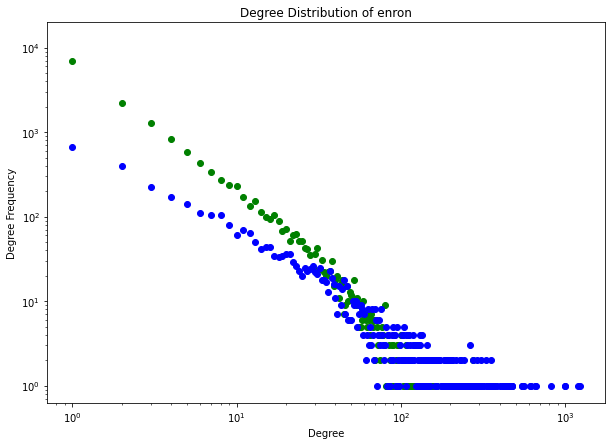

In [8]:
indeg = indegree_s(enron)
outdeg = outdegree_s(enron)
plt.figure(figsize=(10, 7)) 
plt.loglog(range(len(indeg)), indeg, linestyle='', marker='o', color='g', label='in-degree') 
plt.loglog(range(len(outdeg)), outdeg, linestyle='', marker='o', color='b', label='out-degree')
plt.title('Degree Distribution of enron')
plt.xlabel('Degree')
plt.ylabel('Degree Frequency')

In [43]:
com_subgraph = (enron_undir.subgraph(c) for c in nx.connected_components(enron_undir))

giant_enron = max(com_subgraph,key=len)
ndg = giant_enron.number_of_nodes()
edg = giant_enron.number_of_edges()
print("Node number: ", ndg, "Edge number: ", edg)

Node number:  15837 Edge number:  90194


## Epinion Network

In [46]:
epin = nx.read_edgelist('soc-Epinions1.txt', create_using=nx.DiGraph)
epin_undir = nx.read_edgelist('soc-Epinions1.txt', create_using=nx.Graph)

In [45]:
nd_lar = epin.number_of_nodes()
ed_lar = epin.number_of_edges()
print("Node number: ", nd_lar, "Edge number: ", ed_lar)

Node number:  75879 Edge number:  508837


In [48]:
avg = nx.average_clustering(epin, count_zeros = True)
print("The average clustering coefficient of Epinion is: ", avg)

den = nx.density(epin)
print("Density of Epinion: ", den)

The average clustering coefficient of Epinion is:  0.11017387558244757
Density of Epinion:  8.837739770666582e-05


In [50]:
com_subgraph = (epin_undir.subgraph(c) for c in nx.connected_components(epin_undir))

giant_epin = max(com_subgraph,key=len)
ndg = giant_epin.number_of_nodes()
edg = giant_epin.number_of_edges()
print("Node number: ", ndg, "Edge number: ", edg)

Node number:  75877 Edge number:  405739


Text(0, 0.5, 'Degree Frequency')

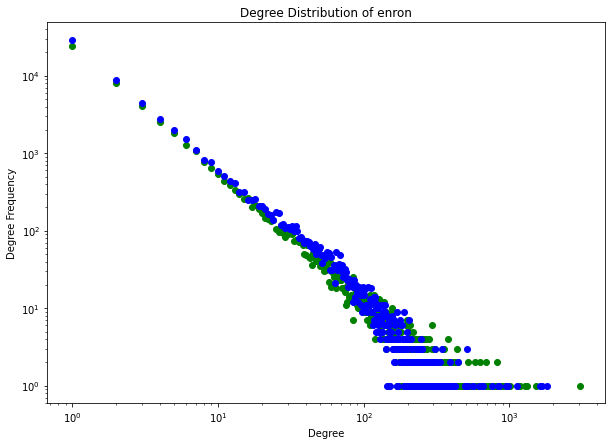

In [51]:
indeg = indegree_s(epin)
outdeg = outdegree_s(epin)
plt.figure(figsize=(10, 7)) 
plt.loglog(range(len(indeg)), indeg, linestyle='', marker='o', color='g', label='in-degree') 
plt.loglog(range(len(outdeg)), outdeg, linestyle='', marker='o', color='b', label='out-degree')
plt.title('Degree Distribution of enron')
plt.xlabel('Degree')
plt.ylabel('Degree Frequency')

## Adversary Knowledge


In [29]:
%%time
enron_nodes = list(enron.nodes)

CPU times: total: 0 ns
Wall time: 1 ms


## Perturbation

In [9]:
import math
import random

In [26]:
def randomly_perturb_graph(G, percentage):
    perturbations = math.floor(nx.number_of_edges(G) * percentage)

    # TODO: create variant that cals nx edges and non edges once
    for i in range(perturbations):
        edge_to_delete = random.choice(list(nx.edges(G)))
        edge_to_add = random.choice(list(nx.non_edges(G)))

        G.remove_edge(*edge_to_delete)
        G.add_edge(*edge_to_add)

    return G

In [31]:
%%time
enron_ran0 = randomly_perturb_graph(enron_undir, 0.0001)

CPU times: total: 2min 48s
Wall time: 2min 49s


In [34]:
nd_lar = enron.number_of_nodes()
ed_lar = enron.number_of_edges()
print("Node number: ", nd_lar, "Edge number: ", ed_lar)

Node number:  15920 Edge number:  98681


In [33]:
nd_lar = enron_ran0.number_of_nodes()
ed_lar = enron_ran0.number_of_edges()
print("Node number: ", nd_lar, "Edge number: ", ed_lar)

Node number:  15920 Edge number:  90261


In [36]:
avg = nx.average_clustering(enron, count_zeros = True)
print("The average clustering coefficient of Epinion is: ", avg)

den = nx.density(enron)
print("Density of Epinion: ", den)

The average clustering coefficient of Epinion is:  0.19233129027074009
Density of Epinion:  0.0003893809458120428


In [37]:
avg = nx.average_clustering(enron_ran0, count_zeros = True)
print("The average clustering coefficient of Epinion is: ", avg)

den = nx.density(enron_ran0)
print("Density of Epinion: ", den)

The average clustering coefficient of Epinion is:  0.25106406566848266
Density of Epinion:  0.000712313688550801


## Hep-Th Dataset subset select

In [19]:
hepth = pd.read_csv('Cit-HepTh.txt', sep='\t')

In [20]:
hepth.head()

,# FromNodeId,ToNodeId
0,1001,9304045
1,1001,9308122
2,1001,9309097
3,1001,9311042
4,1001,9401139


In [21]:
time_hep = hepth.groupby(hepth.columns.tolist(),as_index=False).size()

In [22]:
time_hep

,# FromNodeId,ToNodeId,size
0,1001,9304045,1
1,1001,9308122,1
2,1001,9309097,1
3,1001,9311042,1
4,1001,9401139,1
...,...,...,...
352802,9912293,9907211,1
352803,9912293,9908105,1
352804,9912293,9908142,1
352805,9912293,9909081,1


In [24]:
time_hep.drop(time_hep.loc[time_hep['size']<2].index, inplace=True)

In [25]:
time_hep

,# FromNodeId,ToNodeId,size
